In [17]:
import      numpy               as      np
import      matplotlib.pyplot   as      plt
from        lib_Experimentum    import  *
from        Alessandria         import  *


#path dove stanno i dati del fit
now_path        =   '../BRILLOUIN/TDP43/NO_ARS_12_02/analysis_new_cut_delta_exp/'

### recupero info su dimensionalità
spectra_path = '../BRILLOUIN/TDP43/NO_ARS_12_02/'
spectra_filename    =   'NO_ARS_12_02'
n_rows    =   len(Import_from_Matlab(spectra_filename, spectra_path, var_name = 'y3'))
n_cols  =   len(Import_from_Matlab(spectra_filename, spectra_path, var_name = 'y3')[0])
###
matrix, rows, cols = Initialize_Matrix(0,0,n_rows,n_cols)

Ho inizializzato una matrice 101x83, per un totale di 8383 spettri


In [18]:

#1) Recupero info su posizioni + info su chi è bono e chi no e su VIPA (questo solo per matrix[0][0])

with open(now_path+'xy.txt', 'r') as fin:
    lines = fin.readlines()[1:]

excluded = ()

with open(now_path+'markov_fit.txt', 'r') as fin:
    fit     =   eval(fin.read())
_,_,_, boni = Unpack_Fit(fit)

"""
with open(now_path+'xy_VIPA.txt', 'r') as fin:
    VIPAs = fin.readlines()[1:]

x_VIPA = np.array(VIPAs[0][1:-2].split(), dtype=float)
y_VIPA = np.array(VIPAs[1][1:-2].split(), dtype=float)

matrix[0][0].Recover_VIPA(x_VIPA, y_VIPA)
"""
count = 0
for ii in range(len(rows)):
    for jj in range(len(cols)):
        #print(str((ii,jj)))
        matrix[ii][jj].Recover_Spectrum(np.array(lines[count][1:-2].split(), dtype=float), np.array(lines[count+1][1:-2].split(), dtype=float))
        
        if (ii,jj) not in boni:
            excluded = excluded +((ii,jj),)

        count = count + 2

print('Ok ho recuperato le informazioni sulle posizioni')

Ok ho recuperato le informazioni sulle posizioni


In [19]:
#2) Acquisico i dati prodotti dal fit markoviano


##################### MARKOVIANO

with open(now_path+'y_markov_fit.txt', 'r') as fin:
    y_fits = fin.readlines()

with open(now_path+'cost_markov.txt', 'r') as fin:
    costi = fin.readlines()

with open(now_path+'markov_fit_params.txt', 'r') as fin:
    lines   =   fin.readlines()

if (len(boni) != len(lines)):
    raise ValueError("Incompatibilità tra lunghezza file parametri ({}) e informazioni fit ({})".format(len(boni), len(lines)))

for (line, y_fit, cost, (ii,jj)) in zip(lines, y_fits, costi,  boni) :
#for (line, cost, (ii,jj)) in zip(lines, costi,   boni) :
    matrix[ii][jj].Recover_Markov_Fit_Params(line)
    matrix[ii][jj].Recover_y_markov_fit(np.array(y_fit[1:-2].split(), dtype = float))
    matrix[ii][jj].Recover_cost_markov(float(cost))

print('Ok ho recuperato le informazioni del Fit Markoviano')



Ok ho recuperato le informazioni del Fit Markoviano


In [20]:
omega_too_high =  ()
gamma_too_high = ()
omega_too_high = Whose_Param_Too_High('Omega', 8.2, 'markov', matrix, boni)
print(len(omega_too_high))
gamma_too_high = Whose_Param_Too_High('Gamma', 0.35, 'markov', matrix, boni)
print(len(gamma_too_high))



0
(25, 57) ha Gamma= 0.39
(68, 24) ha Gamma= 0.53
(68, 28) ha Gamma= 0.36
(68, 40) ha Gamma= 0.35
(70, 21) ha Gamma= 1.55
(71, 21) ha Gamma= 1.95
(71, 67) ha Gamma= 0.48
(72, 21) ha Gamma= 1.96
(73, 21) ha Gamma= 2.00
(74, 21) ha Gamma= 1.87
(81, 40) ha Gamma= 0.35
(81, 54) ha Gamma= 0.42
(82, 33) ha Gamma= 0.35
13


(25, 57)
                Co     Omega     Gamma  delta_position   delta_width  \
Values    0.173153  7.292525  0.391994    1.416831e+10  1.461243e+06   
StdErrs   0.112906  0.050452  0.029282    1.923946e+16  1.437653e+12   
Initials  0.114068  7.464914  0.128997    1.416801e+10  6.769530e+03   

          delta_amplitude             A         mu      sigma     shift  \
Values       3.199138e+04  2.830438e+03  -2.370959  14.518161  0.163123   
StdErrs      1.193509e+11  5.439685e+09  21.802467  12.274732  0.031479   
Initials     1.464184e+06  2.358718e+03  -2.963698  17.116938  0.241244   

             offset  
Values    45.839357  
StdErrs    5.624094  
Initials   9.873921  


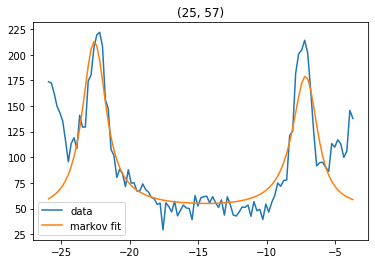

(68, 24)
                Co     Omega    Gamma  delta_position   delta_width  \
Values    0.197618  7.444718  0.53136    1.312952e+10  1.790675e+05   
StdErrs        NaN       NaN      NaN             NaN           NaN   
Initials  0.134157  7.682814  0.23195    1.313176e+10  1.132270e+06   

          delta_amplitude            A        mu      sigma     shift  \
Values       6.730913e+02  4714.960343 -0.205450  16.056702  0.225641   
StdErrs               NaN          NaN       NaN        NaN       NaN   
Initials     8.925712e+09  5883.392418 -0.256812  19.167239  0.257701   

             offset  
Values    45.950079  
StdErrs         NaN  
Initials  20.070099  


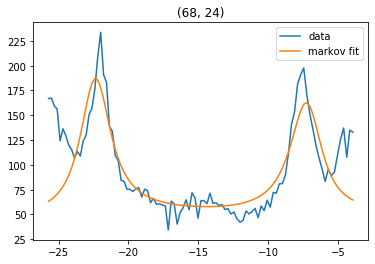

(68, 28)
                Co     Omega     Gamma  delta_position   delta_width  \
Values    0.180700  7.570922  0.358316    5.849931e+11  1.466345e+07   
StdErrs        NaN       NaN       NaN             NaN           NaN   
Initials  0.126851  7.763168  0.184817    5.867982e+11  1.932630e+07   

          delta_amplitude            A        mu      sigma     shift  \
Values       1.025157e+08  1218.889740 -0.210196  16.155905  0.002861   
StdErrs               NaN          NaN       NaN        NaN       NaN   
Initials     1.214159e+07  1523.609166 -0.262745  20.194881  0.309914   

             offset  
Values    52.670866  
StdErrs         NaN  
Initials   4.869106  


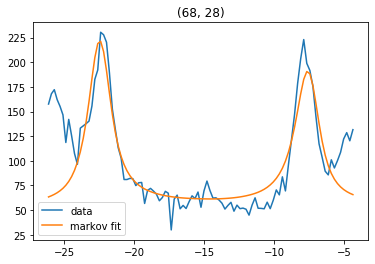

(68, 40)
                Co     Omega     Gamma  delta_position    delta_width  \
Values    0.166383  7.583952  0.350452   -1.772222e+09   59872.595732   
StdErrs        NaN       NaN       NaN             NaN            NaN   
Initials  0.116056  7.835126  0.203500   -1.774221e+09  288330.939656   

          delta_amplitude            A        mu      sigma     shift  \
Values       1.286716e+04  1140.834411 -0.600438  16.462709  0.006154   
StdErrs               NaN          NaN       NaN        NaN       NaN   
Initials     5.540601e+06  1426.016953 -0.750547  19.204749  0.154109   

             offset  
Values    48.143301  
StdErrs         NaN  
Initials   7.430787  


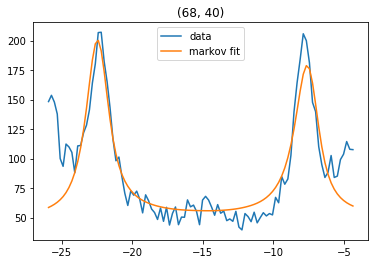

(70, 21)
                Co     Omega     Gamma  delta_position   delta_width  \
Values    0.504386  6.202309  1.546601    6.228987e+10  3.957348e+06   
StdErrs   0.102115  0.381082  0.157271    3.507429e+16  1.513652e+12   
Initials  0.155385  7.458688  0.345876    6.226832e+10  1.338718e+04   

          delta_amplitude             A        mu      sigma     shift  \
Values       1.265794e+05  9.798153e+02 -1.672655  12.677785 -0.448829   
StdErrs      1.356221e+11  7.880835e+08  7.093203   4.448490  0.296774   
Initials     1.901712e+03  1.224768e+03 -2.090817  15.198818  0.211585   

             offset  
Values   -23.568335  
StdErrs   55.463506  
Initials  49.552200  


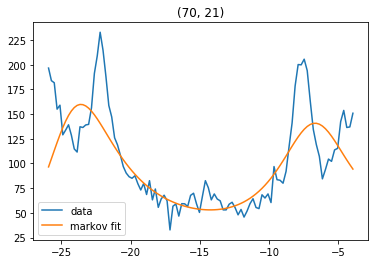

(71, 21)
                Co     Omega     Gamma  delta_position   delta_width  \
Values    0.492196  6.298923  1.953161    1.245797e+11  3.917041e+06   
StdErrs        NaN       NaN       NaN             NaN           NaN   
Initials  0.504386  6.202309  1.546601    6.228987e+10  3.957348e+06   

          delta_amplitude           A        mu      sigma     shift  \
Values      129589.535905  935.675877 -1.668494  12.662760 -0.717193   
StdErrs               NaN         NaN       NaN        NaN       NaN   
Initials    126579.441196  979.815264 -1.672655  12.677785 -0.448829   

             offset  
Values   -72.863883  
StdErrs         NaN  
Initials -23.568335


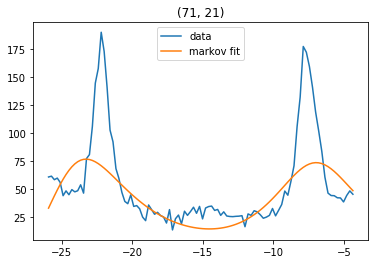

(71, 67)
                Co     Omega     Gamma  delta_position   delta_width  \
Values    0.203967  7.327404  0.482922    5.109414e+10  2.987929e+06   
StdErrs        NaN       NaN       NaN             NaN           NaN   
Initials  0.121770  7.571086  0.175910    5.108282e+10  1.113910e+05   

          delta_amplitude           A        mu      sigma     shift  \
Values       7.328647e+09  634.817953 -0.202318  15.910812  0.228992   
StdErrs               NaN         NaN       NaN        NaN       NaN   
Initials     7.328613e+09  793.449797 -0.252897  18.805141  0.219542   

             offset  
Values    54.611531  
StdErrs         NaN  
Initials  18.700086  


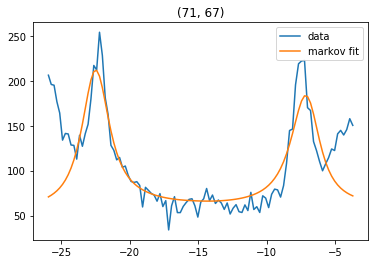

(72, 21)
                Co     Omega     Gamma  delta_position   delta_width  \
Values    0.405096  6.294816  1.955786    1.245797e+11  3.917041e+06   
StdErrs        NaN       NaN       NaN             NaN           NaN   
Initials  0.492196  6.298923  1.953161    1.245797e+11  3.917041e+06   

          delta_amplitude           A        mu      sigma     shift  \
Values      129589.535905  935.675877 -1.669423  12.697555 -0.723182   
StdErrs               NaN         NaN       NaN        NaN       NaN   
Initials    129589.535905  935.675877 -1.668494  12.662760 -0.717193   

             offset  
Values   -72.864618  
StdErrs         NaN  
Initials -72.863883  


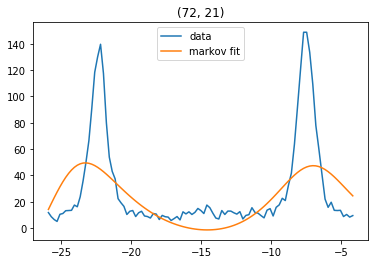

(73, 21)
                Co     Omega     Gamma  delta_position   delta_width  \
Values    0.264279  6.724933  1.999378    1.245758e+11  5.355878e+06   
StdErrs        NaN       NaN       NaN             NaN           NaN   
Initials  0.405096  6.294816  1.955786    1.245797e+11  3.917041e+06   

          delta_amplitude            A        mu      sigma     shift  \
Values      155553.819204  1093.458084 -1.801014  12.677162 -0.699876   
StdErrs               NaN          NaN       NaN        NaN       NaN   
Initials    129589.535905   935.675877 -1.669423  12.697555 -0.723182   

             offset  
Values   -42.726372  
StdErrs         NaN  
Initials -72.864618  


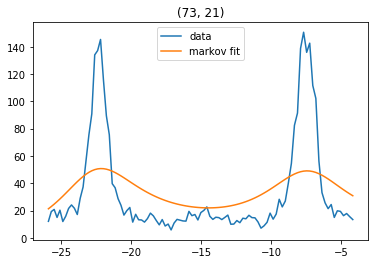

(74, 21)
                Co     Omega     Gamma  delta_position   delta_width  \
Values    0.312753  6.763255  1.872940    1.245789e+11  1.476046e+06   
StdErrs        NaN       NaN       NaN             NaN           NaN   
Initials  0.264279  6.724933  1.999378    1.245758e+11  5.355878e+06   

          delta_amplitude            A        mu      sigma     shift  \
Values       2.259178e+06  1052.692065 -1.831088  12.719682 -0.766027   
StdErrs               NaN          NaN       NaN        NaN       NaN   
Initials     1.555538e+05  1093.458084 -1.801014  12.677162 -0.699876   

             offset  
Values   -46.114373  
StdErrs         NaN  
Initials -42.726372  


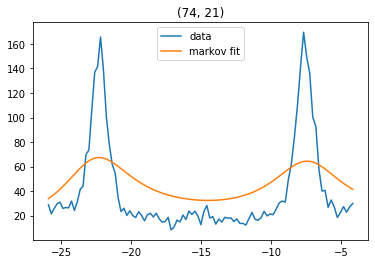

(81, 40)
                Co     Omega     Gamma  delta_position    delta_width  \
Values    0.178186  7.574260  0.351694   -2.313041e+09  307844.421516   
StdErrs        NaN       NaN       NaN             NaN            NaN   
Initials  0.133240  7.765141  0.176232   -2.311853e+09  516222.926283   

          delta_amplitude           A        mu      sigma     shift  \
Values      474920.636239  418.189838 -0.096710  16.288319  0.194920   
StdErrs               NaN         NaN       NaN        NaN       NaN   
Initials     47029.385833  522.737294 -0.120888  20.028005  0.084372   

             offset  
Values    57.385695  
StdErrs         NaN  
Initials   8.232175  


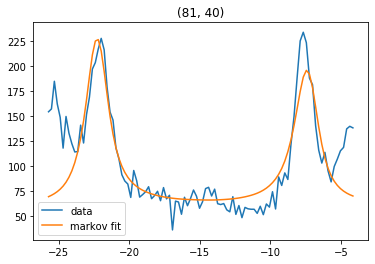

(81, 54)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.190054  7.513980  0.422471  -175258.056142    84.673200   
StdErrs        NaN       NaN       NaN             NaN          NaN   
Initials  0.115708  7.790847  0.207890  -184158.641627   612.607363   

          delta_amplitude           A        mu      sigma     shift  \
Values       2.337442e+08  627.252381 -0.065190  16.777316  0.237310   
StdErrs               NaN         NaN       NaN        NaN       NaN   
Initials     2.337441e+08  773.581076 -0.081488  20.971645  0.202175   

             offset  
Values    55.560422  
StdErrs         NaN  
Initials  12.822404  


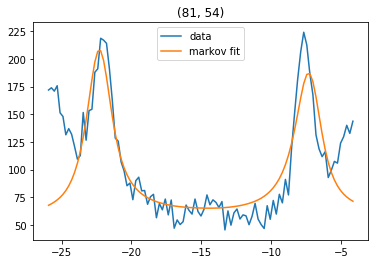

(82, 33)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.178802  7.649095  0.350171   -2.785932e+08   368.835029   
StdErrs        NaN       NaN       NaN             NaN          NaN   
Initials  0.151570  7.709519  0.245951   -2.786401e+08  2746.594348   

          delta_amplitude           A        mu      sigma     shift  \
Values          10.763492  963.351978 -0.034801  16.962383 -0.003039   
StdErrs               NaN         NaN       NaN        NaN       NaN   
Initials      2757.934363  803.390051 -0.043501  18.008340  0.218755   

             offset  
Values    51.241564  
StdErrs         NaN  
Initials  42.678140  


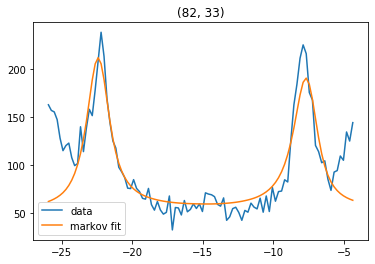

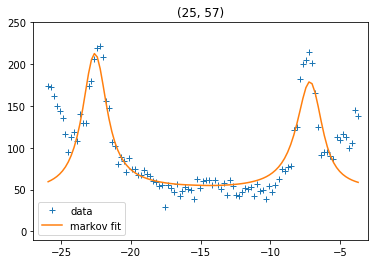

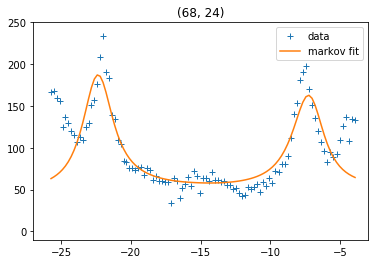

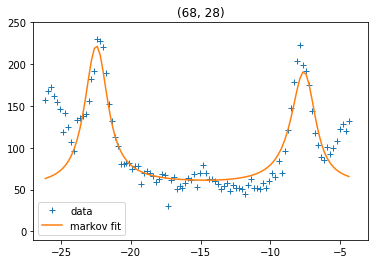

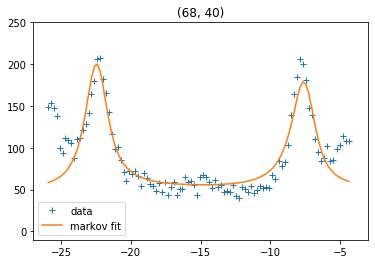

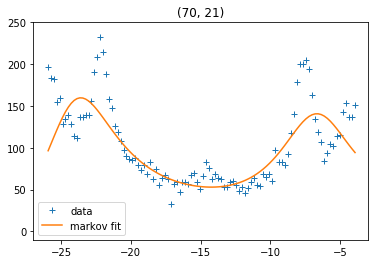

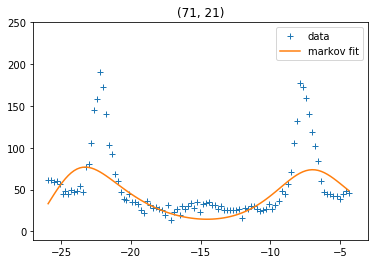

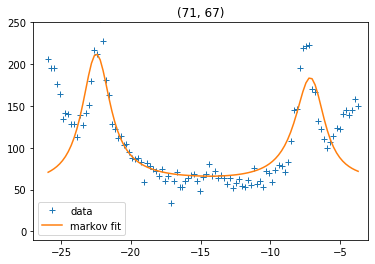

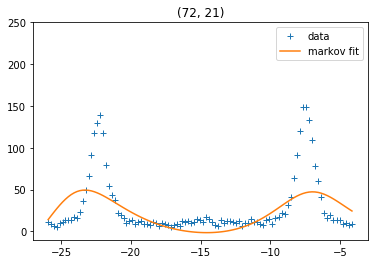

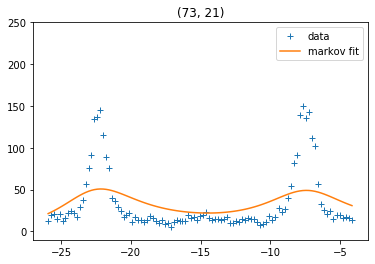

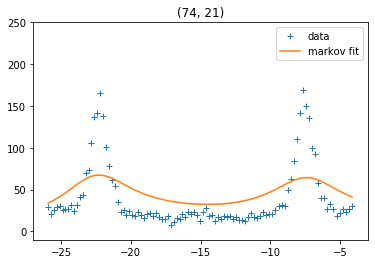

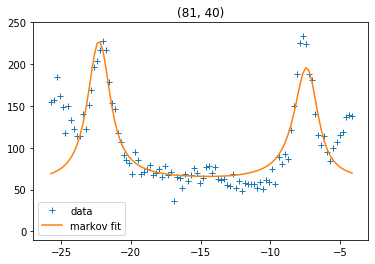

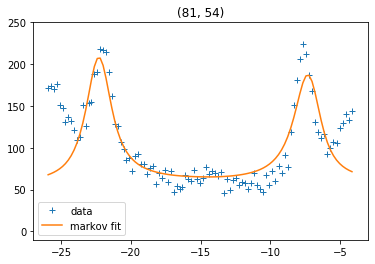

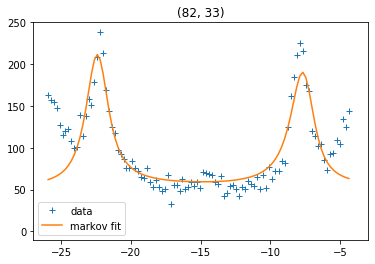

In [21]:
Plot_Elements_Spectrum(matrix, gamma_too_high[0:15], fit = 'markov')
Zoom_Plot(matrix, gamma_too_high[0:15], (-27, -3) , (-10, 250), fit = 'markov')

In [15]:
too_bad = ()
too_good  = ()
too_bad = Get_Bad_Elements(matrix, boni, 1000)
too_good = Get_Good_Elements(matrix, boni, 50)

I found 4452 bad elements 

I found 0 good elements 



(0, 0)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.087602  7.474550  0.108014        0.202956     0.011987   
StdErrs   0.227831  0.020738  0.010080        0.519965     0.698997   
Initials  0.010000  7.478667  0.100000        0.000000     0.100000   

          delta_amplitude             A         mu      sigma     shift  \
Values           1.142876  5.339035e+03  -8.162679  12.781545  0.127205   
StdErrs        575.474214  9.622804e+09  35.459018  32.129260  0.016335   
Initials         1.000000  5.261980e+03 -10.202727  15.976457  0.000000   

            offset  
Values    4.272969  
StdErrs   0.514243  
Initials  0.000000  


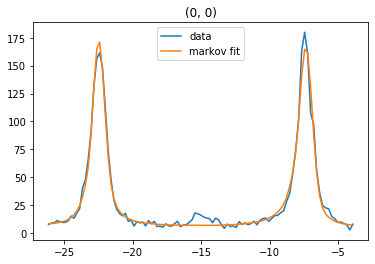

(34, 32)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.102867  7.732572  0.160696        1.194220     0.949403   
StdErrs   0.163072  0.021214  0.016162        0.851621     0.294502   
Initials  0.087602  7.474550  0.108014        0.202956     0.011987   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.298744  4.271228e+03  -6.530144  14.530354  0.133201   
StdErrs          0.213967  7.209508e+09  33.834115  28.148614  0.020687   
Initials         1.142876  5.339035e+03  -8.162679  12.781545  0.127205   

             offset  
Values    10.432931  
StdErrs    2.669216  
Initials   4.272969  


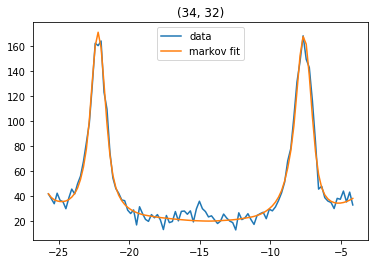

(34, 53)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.082555  7.707194  0.163463        0.957216     0.063024   
StdErrs   0.139371  0.019939  0.014450        0.001715     0.018462   
Initials  0.087602  7.474550  0.108014        0.202956     0.011987   

          delta_amplitude             A         mu      sigma     shift  \
Values       1.249017e+05  4.361754e+03  -8.557751  12.101945  0.150882   
StdErrs      1.321371e+06  8.500771e+09  18.644965  17.320671  0.020330   
Initials     1.142876e+00  5.339035e+03  -8.162679  12.781545  0.127205   

             offset  
Values    10.962502  
StdErrs    2.622752  
Initials   4.272969  


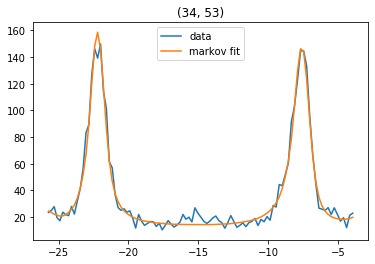

(34, 54)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.102815  7.704069  0.157352        0.316788     0.082822   
StdErrs   0.212013  0.020042  0.015677        0.004206     0.157482   
Initials  0.087602  7.474550  0.108014        0.202956     0.011987   

          delta_amplitude             A         mu      sigma     shift  \
Values        3234.684454  5.925064e+03  -6.530144  15.329216  0.175934   
StdErrs     166104.091053  9.915742e+09  49.467369  43.386145  0.019469   
Initials         1.142876  5.339035e+03  -8.162679  12.781545  0.127205   

            offset  
Values    7.941836  
StdErrs   2.738502  
Initials  4.272969  


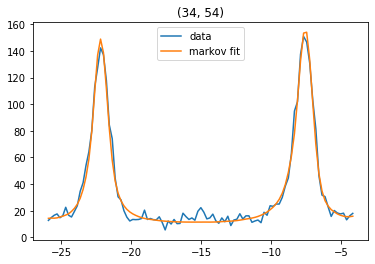

(49, 66)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.072466  7.613230  0.162356        1.387445     0.941142   
StdErrs   0.143251  0.023143  0.017262        0.436281     0.122674   
Initials  0.087602  7.474550  0.108014        0.202956     0.011987   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.325436  4.988811e+03  -8.992707  11.664444  0.315312   
StdErrs          0.110274  1.100582e+10  19.704157  18.242115  0.023755   
Initials         1.142876  5.339035e+03  -8.162679  12.781545  0.127205   

             offset  
Values    12.000400  
StdErrs    5.207062  
Initials   4.272969  


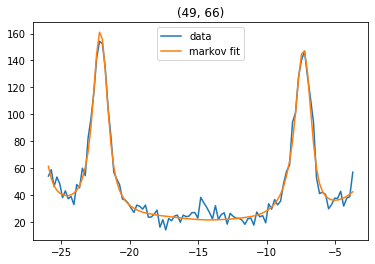

(55, 22)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.089867  7.621596  0.139398        0.198266     0.010362   
StdErrs        NaN       NaN       NaN             NaN          NaN   
Initials  0.087602  7.474550  0.108014        0.202956     0.011987   

          delta_amplitude            A        mu      sigma     shift  \
Values           0.018933  5959.413204 -7.674222  13.432341  0.244910   
StdErrs               NaN          NaN       NaN        NaN       NaN   
Initials         1.142876  5339.035344 -8.162679  12.781545  0.127205   

            offset  
Values    8.416678  
StdErrs        NaN  
Initials  4.272969  


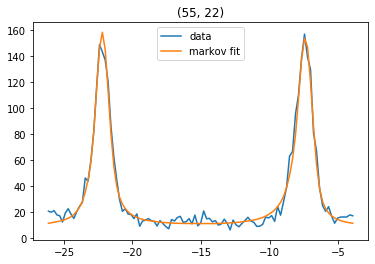

(69, 25)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.102178  7.874628  0.191576        0.319855     0.092112   
StdErrs   0.337667  0.025584  0.018085        0.002387     0.018290   
Initials  0.087602  7.474550  0.108014        0.202956     0.011987   

          delta_amplitude             A         mu      sigma     shift  \
Values        2360.457398  5.341284e+03  -8.373960  13.581688  0.252310   
StdErrs       9256.259612  8.445833e+09  48.246216  47.429673  0.021316   
Initials         1.142876  5.339035e+03  -8.162679  12.781545  0.127205   

             offset  
Values    11.304381  
StdErrs    2.528798  
Initials   4.272969  


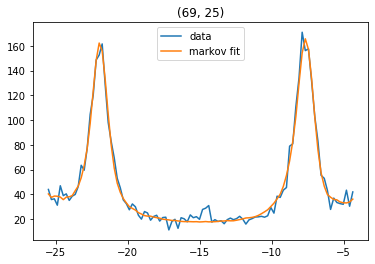

(69, 26)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.087783  7.820112  0.180014        1.135522     1.016761   
StdErrs   0.206020  0.025036  0.018405        0.546763     0.100784   
Initials  0.087602  7.474550  0.108014        0.202956     0.011987   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.564799  5.752943e+03  -9.545350  12.072788  0.215513   
StdErrs          0.160245  1.002338e+10  22.208080  23.603578  0.024580   
Initials         1.142876  5.339035e+03  -8.162679  12.781545  0.127205   

             offset  
Values    12.482476  
StdErrs    5.570756  
Initials   4.272969  


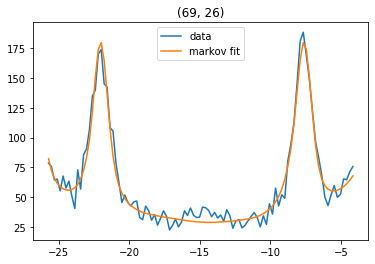

(69, 58)
                Co     Omega     Gamma  delta_position   delta_width  \
Values    0.106395  7.823914  0.169244    5.772041e-02  8.037869e-02   
StdErrs   0.165470  0.019261  0.013732    1.952832e+06  1.871979e+06   
Initials  0.087602  7.474550  0.108014    2.029562e-01  1.198743e-02   

          delta_amplitude             A         mu      sigma     shift  \
Values       3.101055e-01  6.406842e+03  -6.786426  15.337854  0.232329   
StdErrs      4.126903e+06  1.439396e+10  36.158929  32.275895  0.020777   
Initials     1.142876e+00  5.339035e+03  -8.162679  12.781545  0.127205   

            offset  
Values    7.243493  
StdErrs   0.956730  
Initials  4.272969  


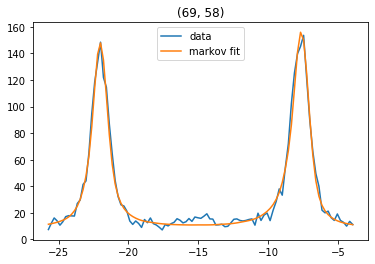

(71, 20)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.108345  7.711241  0.158104        0.204424     0.069293   
StdErrs   0.264275  0.018748  0.013689        0.134014     0.369304   
Initials  0.087602  7.474550  0.108014        0.202956     0.011987   

          delta_amplitude             A         mu      sigma     shift  \
Values           1.061377  5.412796e+03  -6.530500  15.274435  0.161988   
StdErrs          0.554353  1.025192e+10  57.667240  50.493567  0.018977   
Initials         1.142876  5.339035e+03  -8.162679  12.781545  0.127205   

            offset  
Values    5.617007  
StdErrs   4.381682  
Initials  4.272969  


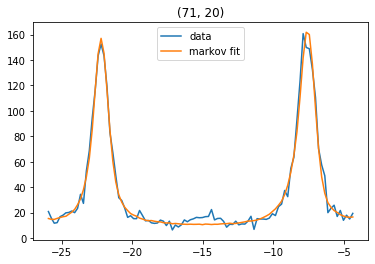

(71, 23)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.085234  7.764633  0.192067        1.210403     0.968877   
StdErrs   0.169454  0.027633  0.020156        0.506707     0.085628   
Initials  0.087602  7.474550  0.108014        0.202956     0.011987   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.667559  5.055126e+03  -9.364449  11.944774  0.162279   
StdErrs          0.164963  8.125172e+09  18.857628  19.421711  0.026169   
Initials         1.142876  5.339035e+03  -8.162679  12.781545  0.127205   

             offset  
Values    10.209602  
StdErrs    5.442968  
Initials   4.272969  


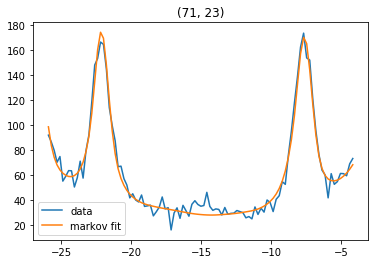

(71, 24)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.089326  7.931374  0.220747        1.358870     0.873413   
StdErrs   0.123492  0.033768  0.025280        0.483037     0.107961   
Initials  0.087602  7.474550  0.108014        0.202956     0.011987   

          delta_amplitude             A         mu      sigma     shift  \
Values           1.779260  4.271228e+03  -9.795215  11.873873  0.164900   
StdErrs          0.474407  4.898293e+09  11.754249  12.968238  0.036081   
Initials         1.142876  5.339035e+03  -8.162679  12.781545  0.127205   

             offset  
Values    18.136767  
StdErrs    4.967004  
Initials   4.272969  


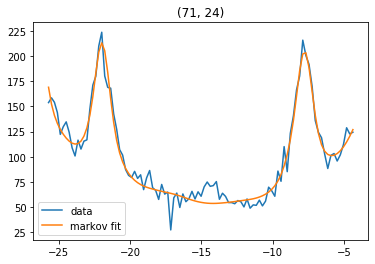

(71, 48)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.082589  7.781033  0.160120        1.295283     0.837831   
StdErrs   0.094243  0.026475  0.019517        0.308478     0.080204   
Initials  0.087602  7.474550  0.108014        0.202956     0.011987   

          delta_amplitude             A        mu      sigma     shift  \
Values           1.866194  6.406789e+03 -9.795215  11.172977  0.169731   
StdErrs          0.377755  7.320259e+09  8.571730   9.041126  0.026451   
Initials         1.142876  5.339035e+03 -8.162679  12.781545  0.127205   

             offset  
Values    17.401041  
StdErrs    6.749623  
Initials   4.272969  


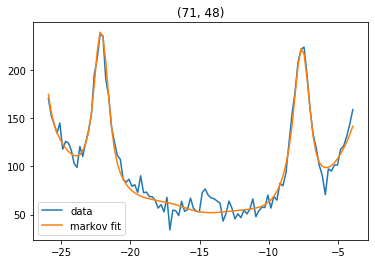

(71, 60)


AttributeError: 'Spectrum' object has no attribute 'y_markov_fit'

In [23]:
Plot_Elements_Spectrum(matrix, [(0, 0),
 (34, 32),
 (34, 53),
 (34, 54),
 (49, 66),
 (55, 22),
 (69, 25),
 (69, 26),
 (69, 58),
 (71, 20),
 (71, 23),
 (71, 24),
 (71, 48),
 (71, 60),
 (82, 23),
 (82, 24),
 (82, 25),
 (82, 26),
 (82, 27),
 (82, 30),
 (82, 35),
 (82, 37),
 (82, 39),
 (82, 44),
 (86, 47),
 (86, 48),
 (86, 49),
 (86, 50),
 (92, 45),
 (94, 27),
 (94, 32),
 (96, 38),
 (97, 30),
 (97, 34),
 (97, 36),
 (97, 38),
 (97, 39),
 (97, 40),
 (99, 44),
 (99, 52)],  fit = 'markov')



In [27]:
matrix[71][24].Markov_Fit_Params.T.Initials

Co                    0.087602
Omega                 7.474550
Gamma                 0.108014
delta_position        0.202956
delta_width           0.011987
delta_amplitude       1.142876
A                  5339.035344
mu                   -8.162679
sigma                12.781545
shift                 0.127205
offset                4.272969
Name: Initials, dtype: float64

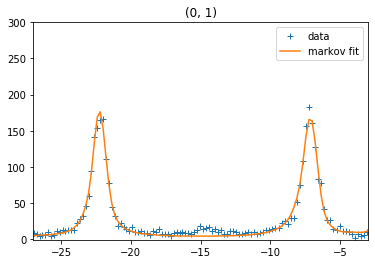

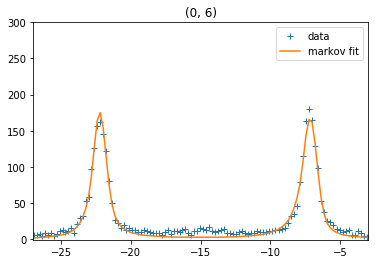

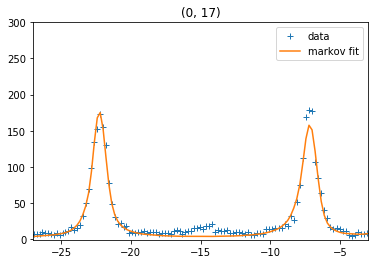

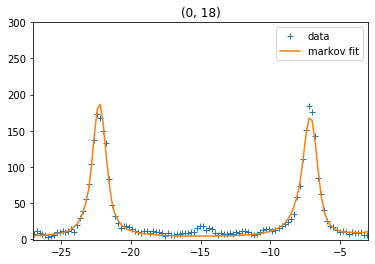

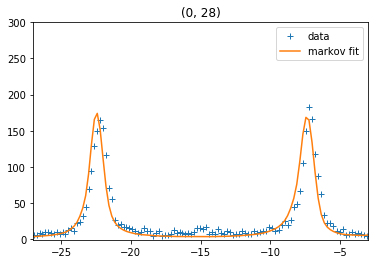

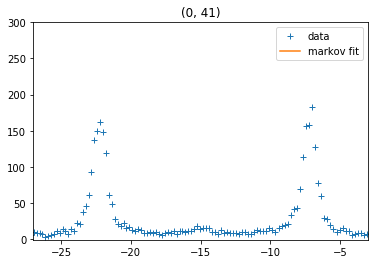

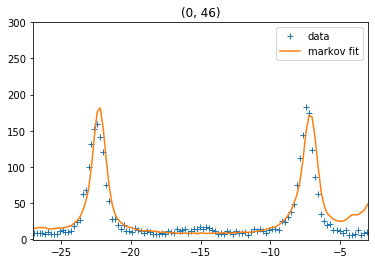

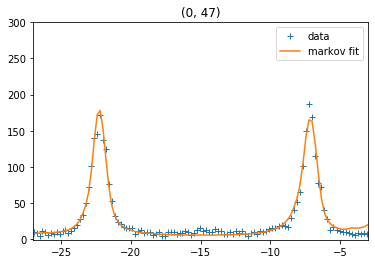

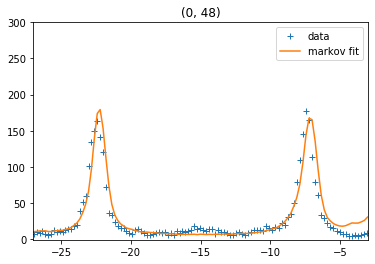

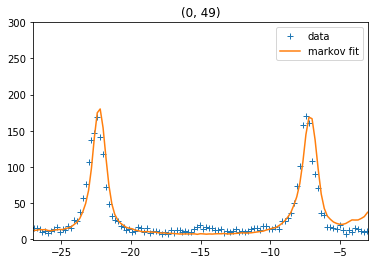

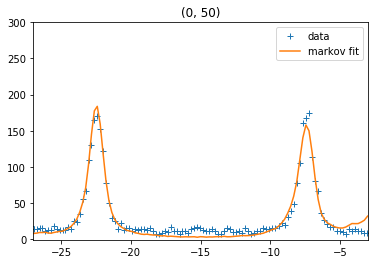

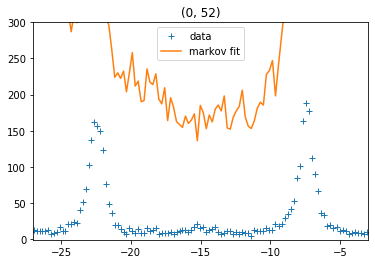

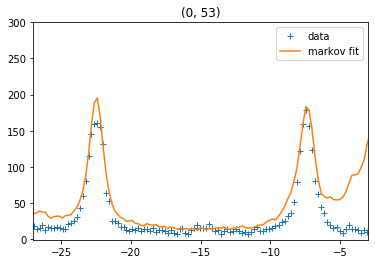

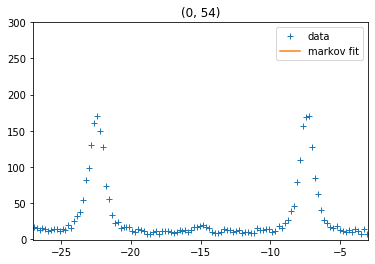

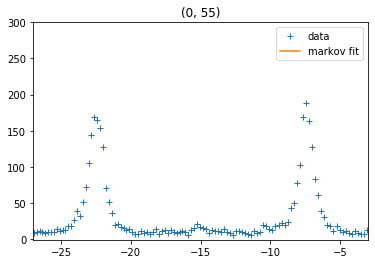

In [8]:
Zoom_Plot(matrix, too_bad[0:15], (-27, -3), (-1, 300), fit = 'markov')
Plot_Elements_Spectrum(matrix, too_good,  fit = 'markov')

In [22]:
matrix[71][21].Markov_Fit_Params

Co     Omega     Gamma  delta_position   delta_width  \
Values    0.492196  6.298923  1.953161    1.245797e+11  3.917041e+06   
StdErrs        NaN       NaN       NaN             NaN           NaN   
Initials  0.504386  6.202309  1.546601    6.228987e+10  3.957348e+06   

          delta_amplitude           A        mu      sigma     shift  \
Values      129589.535905  935.675877 -1.668494  12.662760 -0.717193   
StdErrs               NaN         NaN       NaN        NaN       NaN   
Initials    126579.441196  979.815264 -1.672655  12.677785 -0.448829   

             offset  
Values   -72.863883  
StdErrs         NaN  
Initials -23.568335

(0, 0)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.099146  7.480269  0.147127       -0.002800     0.000428   
StdErrs   0.013444  0.015726  0.009762        7.232458    47.181774   
Initials  0.010000  7.478667  0.100000        0.000000     0.100000   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.032237  6.303852e+03  -8.339110  12.867652  0.122574   
StdErrs       3554.154271  5.158352e+09   1.751234   1.611336  0.015535   
Initials         1.000000  5.261980e+03 -10.202727  15.976457  0.000000   

            offset  
Values   -1.562181  
StdErrs   0.386250  
Initials  0.000000  


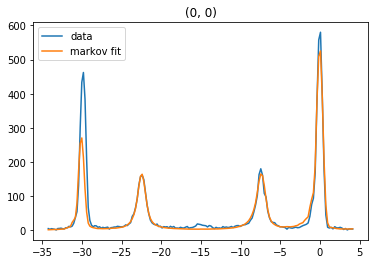

(0, 1)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.089179  7.468189  0.129371       -0.002346     0.000283   
StdErrs   0.014988  0.015359  0.009579       13.683165   113.838701   
Initials  0.099146  7.480269  0.147127       -0.002800     0.000428   

          delta_amplitude             A        mu      sigma     shift  \
Values           0.024291  5.055639e+03 -8.975692  11.957428  0.351075   
StdErrs       9785.875338  3.941060e+09  1.709011   1.597275  0.015445   
Initials         0.032237  6.303852e+03 -8.339110  12.867652  0.122574   

            offset  
Values    0.097354  
StdErrs   0.338201  
Initials -1.562181  


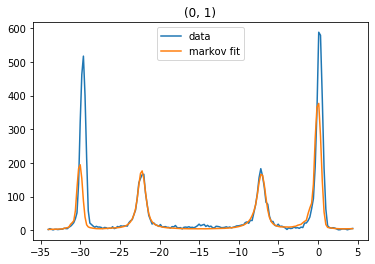

(0, 2)
                Co     Omega     Gamma  delta_position   delta_width  \
Values    0.083969  7.487931  0.116623       -0.000002  2.366702e-10   
StdErrs   0.011742  0.015515  0.009208        0.677166           NaN   
Initials  0.089179  7.468189  0.129371       -0.002346  2.825568e-04   

          delta_amplitude             A        mu      sigma     shift  \
Values           0.024253  5.055639e+03 -8.974726  11.953321  0.158608   
StdErrs      13020.815042  5.007234e+09  1.388191   1.323070  0.015523   
Initials         0.024291  5.055639e+03 -8.975692  11.957428  0.351075   

            offset  
Values    0.085522  
StdErrs   0.282659  
Initials  0.097354  


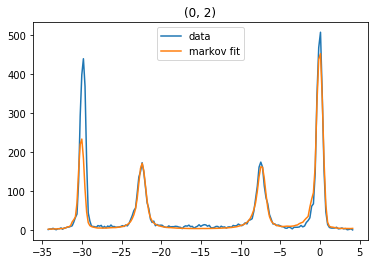

(0, 3)
                Co     Omega     Gamma  delta_position   delta_width  \
Values    0.083969  7.487931  0.116623       -0.000002  2.366702e-10   
StdErrs   0.014578  0.015555  0.009484             NaN           NaN   
Initials  0.083969  7.487931  0.116623       -0.000002  2.366702e-10   

          delta_amplitude             A        mu      sigma     shift  \
Values           0.024253  5.055639e+03 -8.974726  11.953321  0.158608   
StdErrs               NaN  5.071136e+09  1.723369   1.654231  0.015601   
Initials         0.024253  5.055639e+03 -8.974726  11.953321  0.158608   

            offset  
Values    0.085522  
StdErrs   0.284071  
Initials  0.085522  


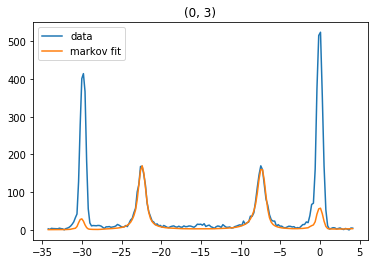

(0, 4)
                Co     Omega     Gamma  delta_position   delta_width  \
Values    0.083969  7.487931  0.116623       -0.000002  2.366702e-10   
StdErrs   0.014535  0.015376  0.009245        0.574437           NaN   
Initials  0.083969  7.487931  0.116623       -0.000002  2.366702e-10   

          delta_amplitude             A        mu      sigma     shift  \
Values           0.024253  5.055639e+03 -8.974726  11.953321  0.158608   
StdErrs               NaN  4.955216e+09  1.724307   1.653981  0.015432   
Initials         0.024253  5.055639e+03 -8.974726  11.953321  0.158608   

            offset  
Values    0.085522  
StdErrs   0.282464  
Initials  0.085522  


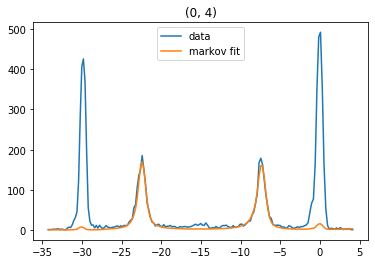

(0, 5)
                Co     Omega     Gamma  delta_position   delta_width  \
Values    0.083969  7.487931  0.116623       -0.000002  2.366702e-10   
StdErrs   0.016721  0.015710  0.009573             NaN           NaN   
Initials  0.083969  7.487931  0.116623       -0.000002  2.366702e-10   

          delta_amplitude             A        mu      sigma     shift  \
Values           0.024253  5.055639e+03 -8.974726  11.953321  0.158608   
StdErrs               NaN  5.097461e+09  1.983364   1.905725  0.015713   
Initials         0.024253  5.055639e+03 -8.974726  11.953321  0.158608   

            offset  
Values    0.085522  
StdErrs   0.289908  
Initials  0.085522  


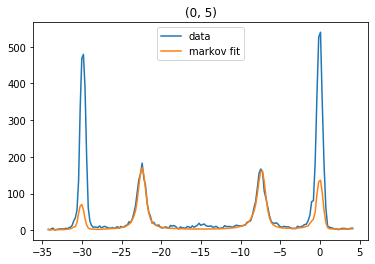

(0, 6)
                Co     Omega     Gamma  delta_position   delta_width  \
Values    0.083361  7.484530  0.129077       -0.000002  2.366697e-10   
StdErrs   0.007306  0.015244  0.009196             NaN  2.281478e-04   
Initials  0.083969  7.487931  0.116623       -0.000002  2.366702e-10   

          delta_amplitude             A        mu      sigma     shift  \
Values           0.024253  5.733757e+03 -9.787128  11.280642  0.355501   
StdErrs        104.306278  4.206489e+09  0.652101   0.647684  0.015055   
Initials         0.024253  5.055639e+03 -8.974726  11.953321  0.158608   

            offset  
Values   -1.041887  
StdErrs   0.277312  
Initials  0.085522  


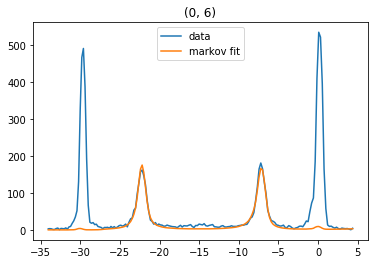

(0, 7)
                Co     Omega     Gamma  delta_position   delta_width  \
Values    0.087428  7.493701  0.125178       -0.000002  2.366535e-10   
StdErrs   0.012786  0.014769  0.009159             NaN           NaN   
Initials  0.083361  7.484530  0.129077       -0.000002  2.366697e-10   

          delta_amplitude             A        mu      sigma     shift  \
Values           0.024253  6.849328e+03 -8.931022  11.697187  0.346275   
StdErrs      32768.637709  9.027077e+09  1.415175   1.289440  0.014924   
Initials         0.024253  5.733757e+03 -9.787128  11.280642  0.355501   

            offset  
Values   -0.554273  
StdErrs   0.255482  
Initials -1.041887  


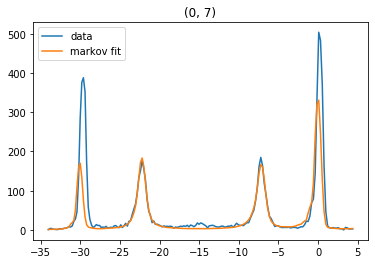

(0, 8)
                Co     Omega     Gamma  delta_position   delta_width  \
Values    0.087428  7.493701  0.125178   -8.518624e-07  5.892707e-11   
StdErrs   0.013158  0.014312  0.008849             NaN           NaN   
Initials  0.087428  7.493701  0.125178   -2.305657e-06  2.366535e-10   

          delta_amplitude             A        mu      sigma     shift  \
Values           0.024253  6.849328e+03 -8.931022  11.697187  0.346275   
StdErrs      10922.739619  3.747030e+09  1.454408   1.325427  0.014379   
Initials         0.024253  6.849328e+03 -8.931022  11.697187  0.346275   

            offset  
Values   -0.554273  
StdErrs   0.286593  
Initials -0.554273  


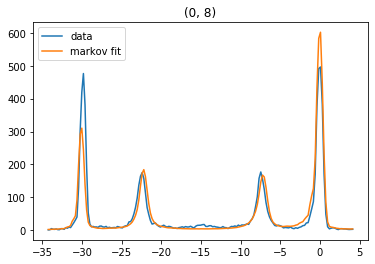

(0, 9)
                Co     Omega     Gamma  delta_position   delta_width  \
Values    0.090168  7.485419  0.125454   -1.314446e-06  9.999386e-11   
StdErrs   0.015420  0.014803  0.009350             NaN  5.359154e-05   
Initials  0.087428  7.493701  0.125178   -8.518624e-07  5.892707e-11   

          delta_amplitude             A        mu      sigma     shift  \
Values           0.024253  5.819253e+03 -8.742968  11.994098  0.115121   
StdErrs               NaN  3.936927e+09  1.765174   1.645320  0.014823   
Initials         0.024253  6.849328e+03 -8.931022  11.697187  0.346275   

            offset  
Values   -0.278786  
StdErrs   0.283160  
Initials -0.554273  


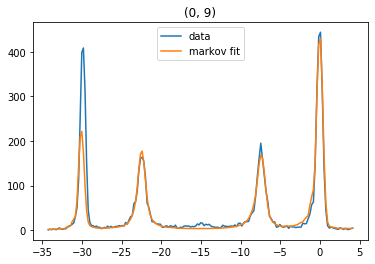

In [30]:
Plot_Elements_Spectrum(matrix, too_good[:10], fit = 'markov')

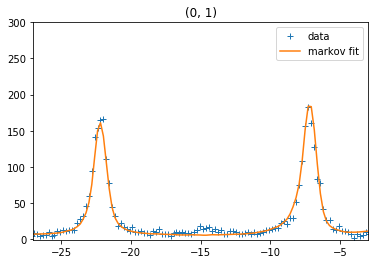

In [16]:
Zoom_Plot(matrix, [(0,1)], (-27, -3), (-1, 300), fit = 'markov')


In [23]:
matrix[0][0].Markov_Fit_Params
matrix[0][0].cost_markov

722.97449455

Completata Parameter_Map per Omega
Ho trovato 66 elementi saturati


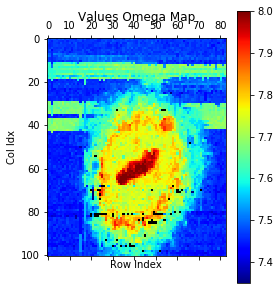

Completata Parameter_Map per Omega
Ho trovato 66 elementi saturati


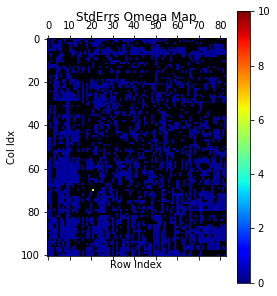

Completata Parameter_Map per Gamma
Ho trovato 66 elementi saturati


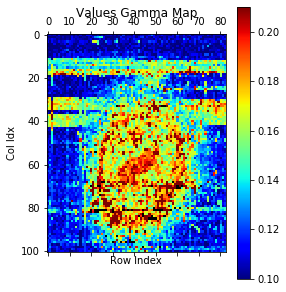

Completata Parameter_Map per Gamma
Ho trovato 66 elementi saturati


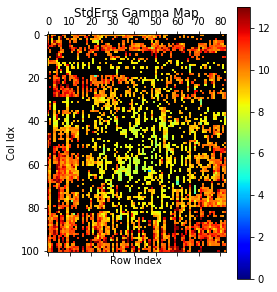

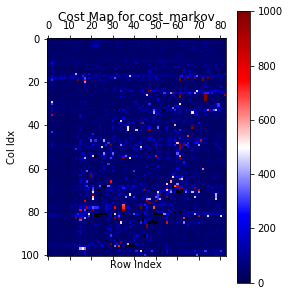

In [25]:
omega_markov_map, _ = Get_Parameter_Map('markov', 'Omega', matrix, n_rows, n_cols, excluded, 'jet', 7.35, 8., fig = 'omega_markov_map', path=now_path)
Delta_omega_markov_map, _ = Get_Parameter_Map('markov', 'Omega', matrix, n_rows, n_cols, excluded, 'jet', 0,10, fig = 'Delta_omega_markov_map', path=now_path, Deltas = True)
gamma_markov_map, _ = Get_Parameter_Map('markov', 'Gamma', matrix, n_rows, n_cols, excluded, 'jet', 0.1,0.21, fig = 'Gamma_markov_map', path=now_path)
Delta_gamma_markov_map, _ = Get_Parameter_Map('markov', 'Gamma', matrix, n_rows, n_cols, excluded, 'jet', 0 , 13, fig = 'Delta_Gamma_markov_map', path=now_path, Deltas = True)
markov_cost_map = Get_cost_map(matrix, 'markov', len(rows), len(cols), 'markov_cost_map', path = now_path)

In [31]:
TOO_OFFSET = ()
for (ii,jj) in boni:
    #if (((ii,jj) in gamma_too_high) | ( (ii,jj) in omega_too_high)) & ((ii,jj) in too_bad):
    #    print(str((ii,jj)))
    if matrix[ii][jj].Markov_Fit_Params['offset'].values[0] > 15.:
        TOO_OFFSET += ((ii,jj),)
        print(str((ii,jj)))


(10, 74)
(18, 8)
(24, 34)
(24, 38)
(24, 39)
(24, 47)
(24, 48)
(24, 78)
(25, 54)
(25, 57)
(25, 58)
(25, 69)
(25, 73)
(25, 74)
(25, 75)
(33, 33)
(33, 50)
(43, 32)
(52, 60)
(53, 16)
(53, 60)
(54, 21)
(54, 35)
(54, 39)
(54, 50)
(54, 61)
(55, 57)
(55, 62)
(67, 55)
(68, 24)
(68, 74)
(69, 21)
(69, 32)
(70, 21)
(70, 25)
(70, 26)
(70, 30)
(70, 44)
(70, 45)
(70, 54)
(70, 55)
(70, 56)
(70, 57)
(70, 59)
(70, 63)
(70, 64)
(70, 66)
(70, 70)
(71, 48)
(71, 51)
(71, 52)
(71, 57)
(71, 58)
(71, 64)
(71, 67)
(80, 53)
(80, 69)
(81, 33)
(81, 36)
(81, 38)
(81, 40)
(81, 41)
(81, 42)
(81, 46)
(81, 54)
(81, 56)
(81, 60)
(81, 62)
(81, 66)
(81, 69)
(82, 13)
(82, 18)
(82, 19)
(82, 31)


(71, 52)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    1.173891  7.832209  0.184486     0.085331    384285.133975   
StdErrs   1.975756  0.023878  0.018789     0.001747    185767.059768   
Initials  1.000000  7.439970  0.579843     0.500000         1.000000   

                     A         mu      sigma     shift     offset  
Values    4.687204e+02  -8.944988  14.681354  0.314085  23.395903  
StdErrs   1.710098e+08  26.656925  30.862671  0.000496   2.094273  
Initials  5.036571e+02  -9.938876  16.312616  0.000000  23.577551  


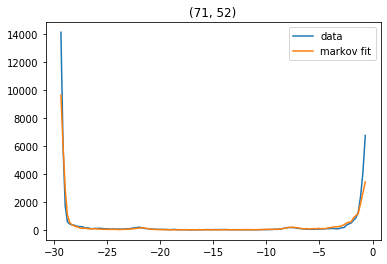

(71, 57)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    1.201084  7.891501  0.188407      0.08566    462772.114052   
StdErrs   1.842060  0.024707  0.019560      0.00158    199909.680202   
Initials  1.000000  7.439970  0.579843      0.50000         1.000000   

                     A         mu      sigma     shift     offset  
Values    5.457706e+02  -8.944988  14.681354  0.314338  26.087986  
StdErrs   1.351049e+08  24.112830  27.979763  0.000447   2.375212  
Initials  5.036571e+02  -9.938876  16.312616  0.000000  23.577551  


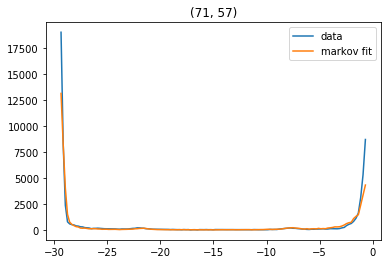

(71, 58)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    1.262257  7.891976  0.207239     0.085750    529688.059955   
StdErrs   1.814780  0.026865  0.021214     0.001457    211241.092195   
Initials  1.000000  7.439970  0.579843     0.500000         1.000000   

                     A         mu      sigma     shift     offset  
Values    5.461142e+02  -8.944988  14.681354  0.314267  30.994042  
StdErrs   1.485000e+08  22.570478  26.242830  0.000418   2.714358  
Initials  5.036571e+02  -9.938876  16.312616  0.000000  23.577551  


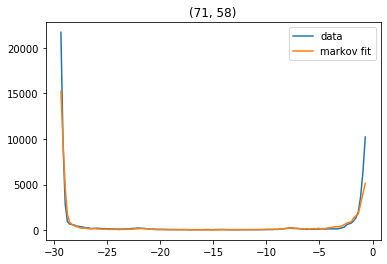

(71, 64)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    1.128265  7.751969  0.157481     0.086694    379585.717225   
StdErrs   1.816318  0.023752  0.018613     0.001393    137100.255826   
Initials  1.000000  7.439970  0.579843     0.500000         1.000000   

                     A         mu      sigma     shift     offset  
Values    5.488374e+02  -8.944988  14.681354  0.314173  27.233168  
StdErrs   1.225278e+08  25.601237  29.709041  0.000499   2.293711  
Initials  5.036571e+02  -9.938876  16.312616  0.000000  23.577551  


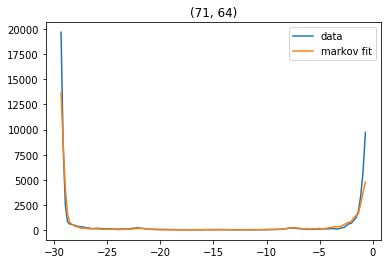

(71, 67)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.886888  7.688049  0.046384     0.087795    303690.978319   
StdErrs   1.265193  0.015270  0.012975     0.001370     99476.023955   
Initials  1.000000  7.439970  0.579843     0.500000         1.000000   

                     A         mu      sigma     shift     offset  
Values    5.365274e+02  -8.944988  14.681354  0.314173  32.562759  
StdErrs   1.820120e+08  23.034183  26.560868  0.000480   2.510410  
Initials  5.036571e+02  -9.938876  16.312616  0.000000  23.577551  


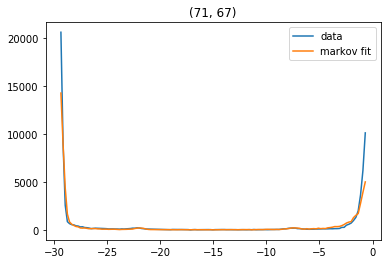

(80, 53)
               Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    1.22089  7.862850  0.194799     0.085124    488903.086135   
StdErrs   1.93131  0.024638  0.019505     0.001591    218612.212977   
Initials  1.00000  7.439970  0.579843     0.500000         1.000000   

                     A         mu      sigma     shift     offset  
Values    4.532945e+02  -8.944988  14.681354  0.314522  26.848593  
StdErrs   1.311664e+08  24.956335  28.926153  0.000445   2.277329  
Initials  5.036571e+02  -9.938876  16.312616  0.000000  23.577551  


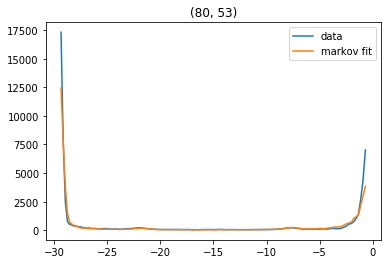

(80, 69)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.998475  7.473676  0.113395     0.083080    394808.217449   
StdErrs   2.202337  0.021187  0.014179     0.001924    230199.508197   
Initials  1.000000  7.439970  0.579843     0.500000         1.000000   

                     A         mu      sigma     shift     offset  
Values    4.539980e+02  -8.944988  14.681354  0.314517  16.448609  
StdErrs   1.378183e+08  36.386888  41.701585  0.000629   1.732917  
Initials  5.036571e+02  -9.938876  16.312616  0.000000  23.577551  


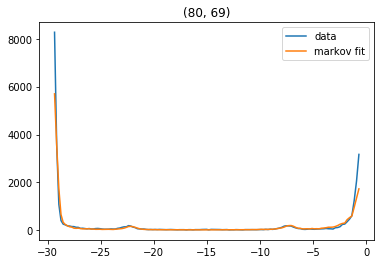

(81, 33)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    1.125479  7.844774  0.160523     0.085141    396498.671931   
StdErrs   2.040224  0.022085  0.017187     0.001638    181993.539679   
Initials  1.000000  7.439970  0.579843     0.500000         1.000000   

                     A         mu      sigma     shift     offset  
Values    5.540087e+02  -8.944988  14.681354  0.314637  21.793566  
StdErrs   2.027518e+08  28.721998  33.190677  0.000517   1.834223  
Initials  5.036571e+02  -9.938876  16.312616  0.000000  23.577551  


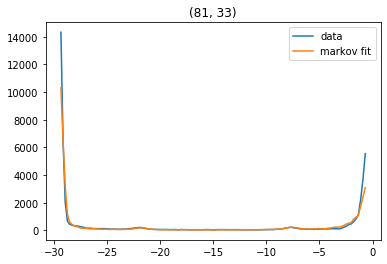

(81, 36)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    1.144595  7.816421  0.176054     0.084061    497959.651285   
StdErrs   2.234409  0.022804  0.017894     0.001917    282855.220069   
Initials  1.000000  7.439970  0.579843     0.500000         1.000000   

                     A         mu      sigma     shift     offset  
Values    5.353058e+02  -8.944988  14.681354  0.314508  22.705036  
StdErrs   2.296501e+08  30.997433  35.805848  0.000521   1.856160  
Initials  5.036571e+02  -9.938876  16.312616  0.000000  23.577551  


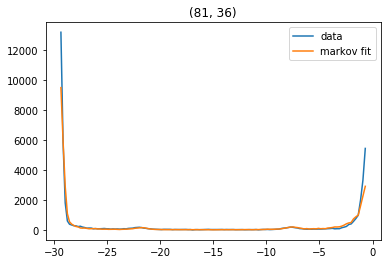

(81, 38)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    1.134099  7.793786  0.171325     0.083571    427567.576638   
StdErrs   2.233020  0.021647  0.016776     0.002035    261468.072614   
Initials  1.000000  7.439970  0.579843     0.500000         1.000000   

                     A         mu      sigma     shift     offset  
Values    4.657597e+02  -8.944988  14.681354  0.314387  17.972742  
StdErrs   1.612237e+08  31.415168  36.221092  0.000533   1.603448  
Initials  5.036571e+02  -9.938876  16.312616  0.000000  23.577551  


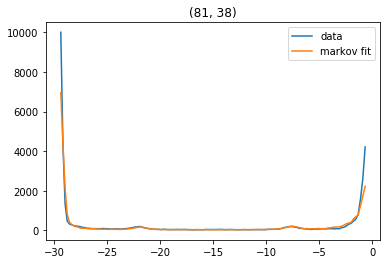

In [32]:
Plot_Elements_Spectrum(matrix, TOO_OFFSET[50:60], fit = 'markov')

In [ ]:
Zoom_Plot(matrix, [(80, 53)], (-27, -3), (-10, 300), fit = 'markov')

In [11]:
################ TOTALE

with open(now_path+'y_tot_fit.txt', 'r') as fin:
    y_fits = fin.readlines()

with open(now_path+'cost_tot.txt', 'r') as fin:
    costi = fin.readlines()
with open(now_path+'tot_fit_params.txt', 'r') as fin:
    lines   =   fin.readlines()

if (len(boni) != len(lines)):
    raise ValueError("Incompatibilità tra lunghezza file parametri ({}) e informazioni fit ({})".format(len(boni), len(lines)))

for (line, y_fit, cost, (ii,jj)) in zip(lines, y_fits, costi,  boni) :
#for (line, cost, (ii,jj)) in zip(lines, costi,  boni) :
    matrix[ii][jj].Recover_Tot_Fit_Params(line)
    matrix[ii][jj].Recover_y_fit(np.array(y_fit[1:-2].split(), dtype = float))
    matrix[ii][jj].Recover_cost_tot(float(cost))

print('Ok ho recuperato le informazioni del Fit Totale')

Ok ho recuperato le informazioni del Fit Totale


(60, 15)


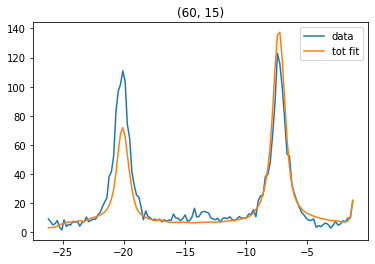

(60, 16)


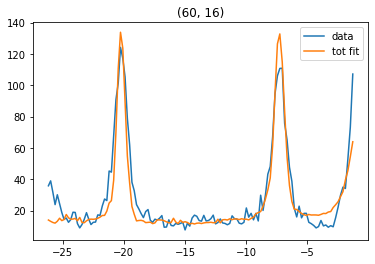

(60, 17)


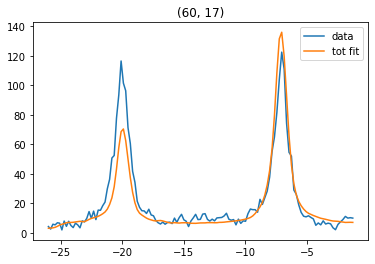

(60, 18)


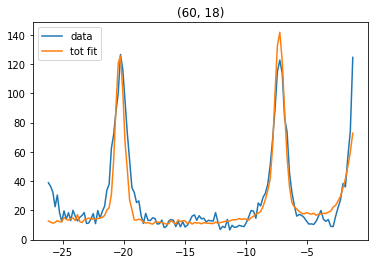

In [12]:
Plot_Elements_Spectrum(matrix, ((60, 15), (60, 16), (60, 17), (60,18)), fit = 'tot')

In [16]:
omega_tot_map, _ = Get_Parameter_Map('tot', 'Omega', matrix, n_rows, n_cols, excluded, 'seismic', 7.3, 8.65, fig = 'omega_tot_map', path=now_path)
Delta_omega_tot_map, _ = Get_Parameter_Map('tot', 'Omega', matrix, n_rows, n_cols, excluded, 'seismic', 0,0.7, fig = 'Delta_omega_tot_map', path=now_path, Deltas = True)
gamma_tot_map, _ = Get_Parameter_Map('tot', 'Gamma', matrix, n_rows, n_cols, excluded, 'seismic', 0.1,0.25, fig = 'Gamma_tot_map', path=now_path)
Delta_gamma_tot_map, _ = Get_Parameter_Map('tot', 'Gamma', matrix, n_rows, n_cols, excluded, 'seismic', 0,0.05, fig = 'Delta_gamma_tot_map', path=now_path, Deltas = True)
tau_map, _ = Get_Parameter_Map('tot', 'tau', matrix, n_rows, n_cols, excluded, 'seismic', 0., 1., fig = 'tau_map', path=now_path)
Delta_tau_map, _ = Get_Parameter_Map('tot', 'tau', matrix, n_rows, n_cols, excluded, 'seismic', 0,0.7, fig = 'Delta_tau_map', path=now_path, Deltas = True)

AttributeError: 'Spectrum' object has no attribute 'Tot_Fit_Params'

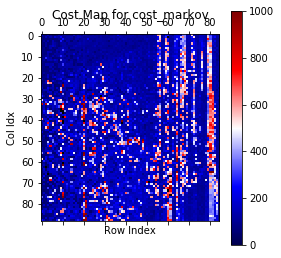

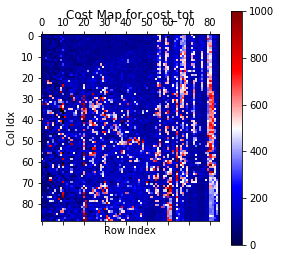

In [30]:
markov_cost_map = Get_cost_map(matrix, 'markov', len(rows), len(cols), 'markov_cost_map', path = now_path)
tot_cost_map = Get_cost_map(matrix, 'tot', len(rows), len(cols), 'tot_cost_map', path = now_path)


(0, 0)


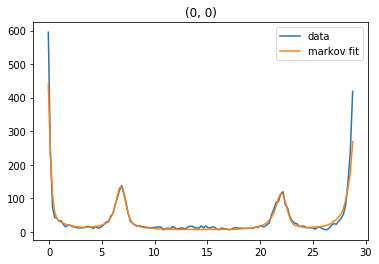

(0, 1)


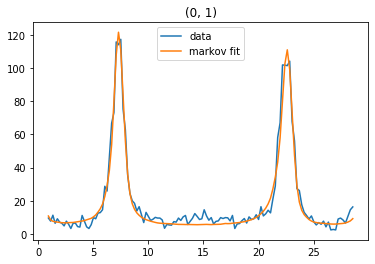

(0, 2)


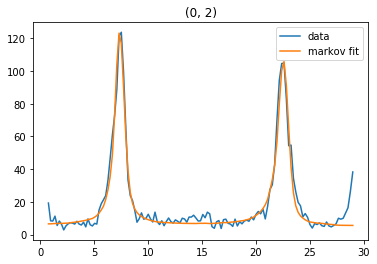

(0, 3)


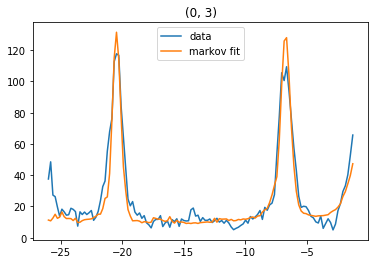

(0, 4)


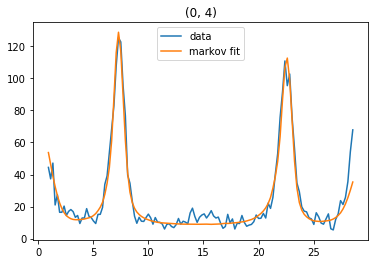

(0, 5)


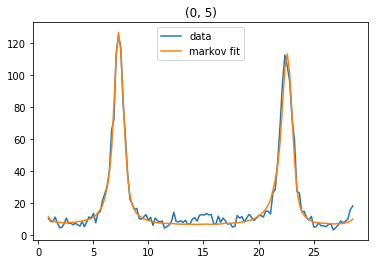

(0, 6)


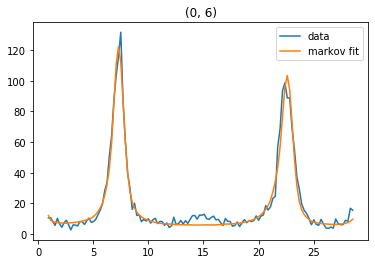

(0, 7)


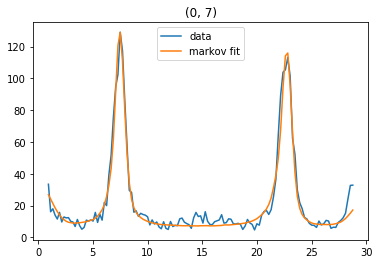

(0, 8)


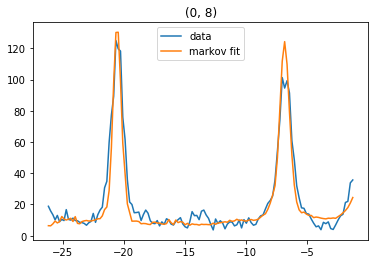

(0, 9)


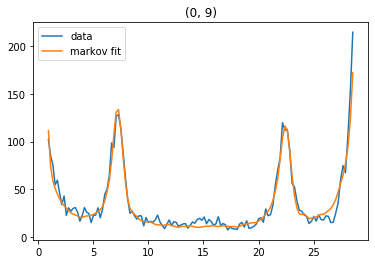

(0, 10)


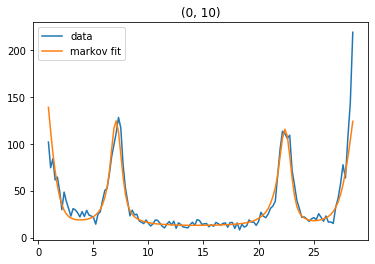

(0, 11)


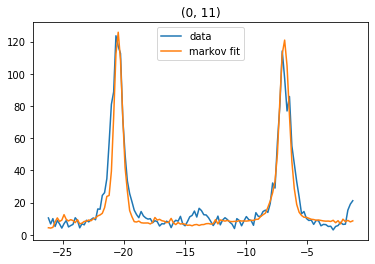

(0, 12)


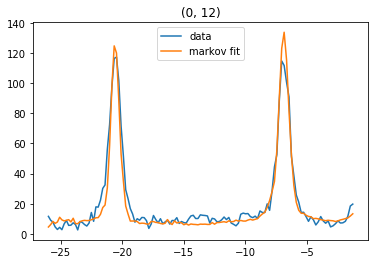

(0, 13)


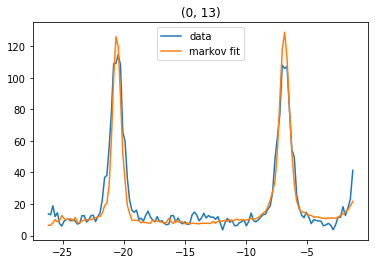

(0, 14)


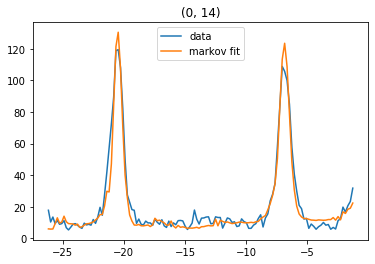

(0, 15)


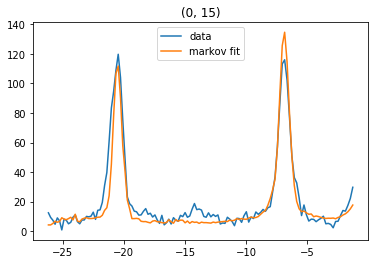

(0, 16)


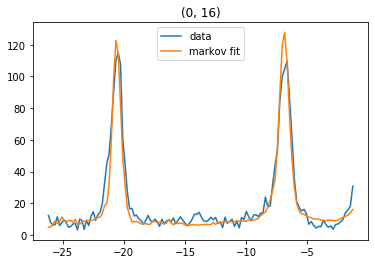

(0, 17)


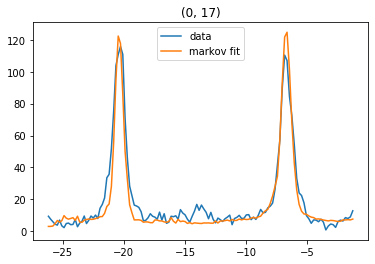

(0, 18)


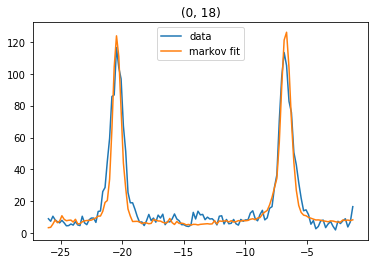

(0, 19)


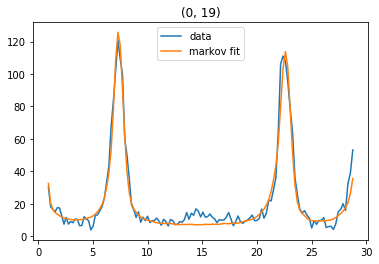

In [33]:
Plot_Elements_Spectrum(matrix, boni[0:20], fit = 'markov')

In [34]:
for (ii,jj) in boni[0:20]:
    print(matrix[ii][jj].Markov_Fit_Params)


Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.690403  7.380093  0.119961     0.346559         4.526239   
StdErrs   0.242094  0.019344  0.013036     0.036666         0.880408   
Initials  1.000000  7.653411  0.613204     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    6.848283e+02  10.409714  18.377639 -0.590578   0.756907  
StdErrs   7.409484e+08   7.496846  13.116684  0.015237   0.704313  
Initials  6.226355e+02  10.851784  16.706945  0.000000  22.742063  
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.576202  7.352200  0.103899     0.331096         0.327227   
StdErrs   0.931994  0.021399  0.013048     0.302070         0.579251   
Initials  1.000000  7.653411  0.613204     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    6.574410e+02   9.766605  15.731842 -0.046762   3.331091  
StdErrs   1.392425e+09  24.854